In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential 

In [2]:
df = pd.read_csv(r'Tadawul_stocks_Prepro.csv')

In [3]:
df = df.reset_index()

In [4]:
df.head()

,index,symbol,name,trading_name,sectoer,date,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades,month,day,year
0,0,2030,Saudi Arabia Refineries Co.,SARCO,Energy,3/5/2020,35.55,35.85,34.90,34.90,-0.40,-1.13,436609,15399073.50,804.0,3,5,2020
1,1,2030,Saudi Arabia Refineries Co.,SARCO,Energy,3/4/2020,34.70,35.65,34.50,35.30,0.25,0.71,737624,25981391.35,1268.0,3,4,2020
2,2,2030,Saudi Arabia Refineries Co.,SARCO,Energy,3/3/2020,34.70,35.15,34.70,35.05,1.05,3.09,489831,17116413.40,854.0,3,3,2020
3,3,2030,Saudi Arabia Refineries Co.,SARCO,Energy,3/2/2020,35.20,35.65,34.00,34.00,-0.55,-1.59,736157,25858700.60,1242.0,3,2,2020
4,4,2030,Saudi Arabia Refineries Co.,SARCO,Energy,3/1/2020,35.35,35.60,34.25,34.55,-2.05,-5.60,738685,25747967.55,1625.0,3,1,2020


In [5]:
df = df.drop([  'name' , 'sectoer' , 'year' ,'month' , 'day' , 'date' , 'perc_Change',  'no_trades' ] , axis = 1)
df.head()

,index,symbol,trading_name,open,high,low,close,change,volume_traded,value_traded
0,0,2030,SARCO,35.55,35.85,34.90,34.90,-0.40,436609,15399073.50
1,1,2030,SARCO,34.70,35.65,34.50,35.30,0.25,737624,25981391.35
2,2,2030,SARCO,34.70,35.15,34.70,35.05,1.05,489831,17116413.40
3,3,2030,SARCO,35.20,35.65,34.00,34.00,-0.55,736157,25858700.60
4,4,2030,SARCO,35.35,35.60,34.25,34.55,-2.05,738685,25747967.55


In [6]:
df = df[df['symbol'] == 2010]
len(df)

4759

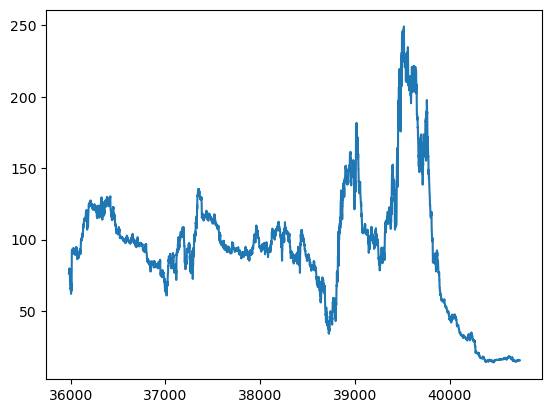

In [7]:
plt.plot(df.close)

In [8]:
ma100 = df.close.rolling(100).mean()
ma100 

35981        NaN
35982        NaN
35983        NaN
35984        NaN
35985        NaN
          ...   
40735    15.6625
40736    15.6425
40737    15.6225
40738    15.6000
40739    15.5750
Name: close, Length: 4759, dtype: float64

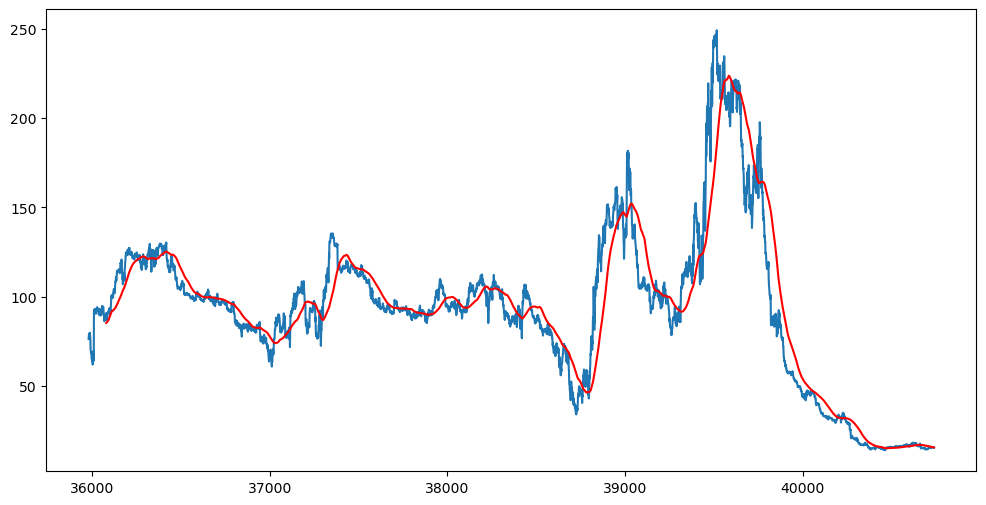

In [9]:
plt.figure(figsize = (12,6))
plt.plot(df.close)
plt.plot(ma100, 'r')

In [10]:
ma200 = df.close.rolling(200).mean()
ma200 

35981         NaN
35982         NaN
35983         NaN
35984         NaN
35985         NaN
           ...   
40735    16.28375
40736    16.28125
40737    16.27875
40738    16.27625
40739    16.27250
Name: close, Length: 4759, dtype: float64

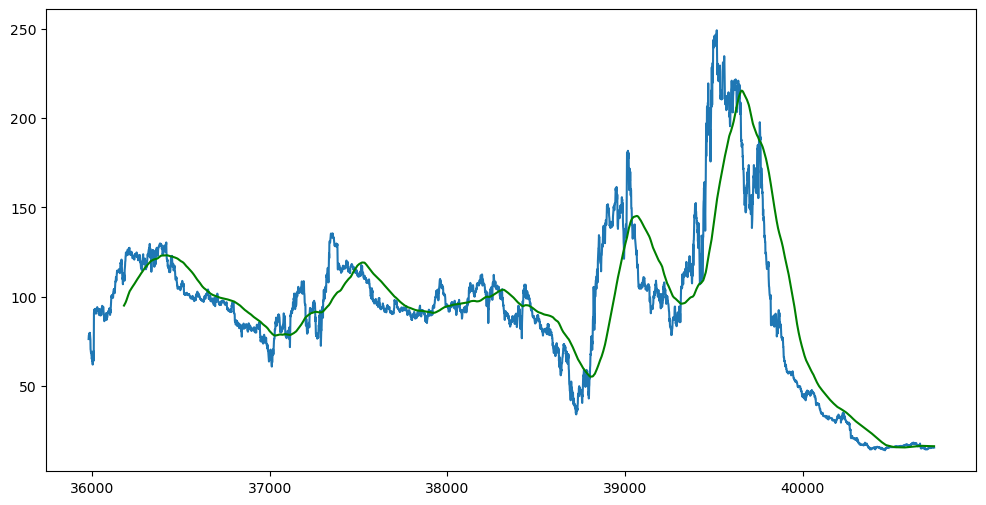

In [11]:
plt.figure(figsize = (12,6))
plt.plot(df.close)
plt.plot(ma200, 'g')

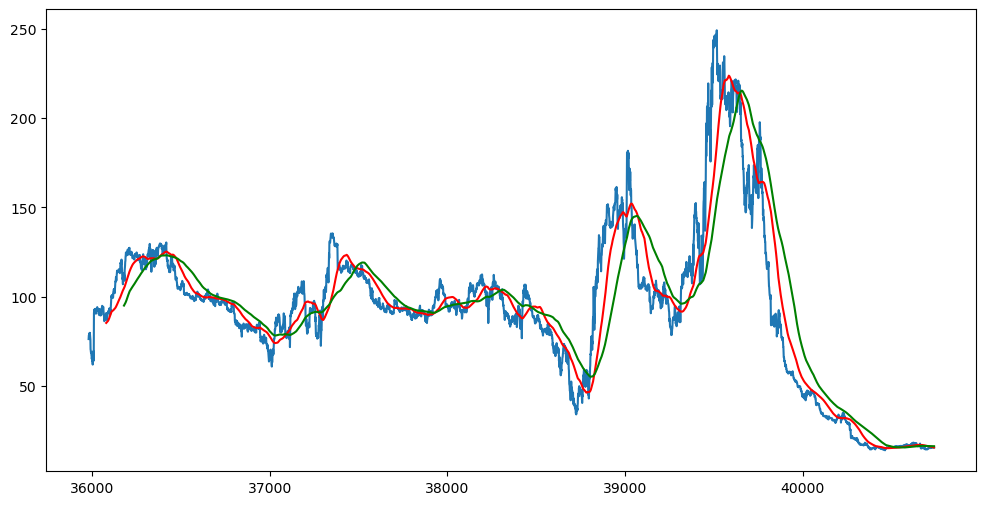

In [12]:
plt.figure(figsize = (12,6))
plt.plot(df.close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [13]:
df.shape

(4759, 10)

In [14]:
# Splitting data into training and testing

data_training = pd.DataFrame(df['close'][0:int(len(df)*0.7)])
data_testing = pd.DataFrame(df['close'][int(len(df)*0.7) : int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(3331, 1)
(1428, 1)


In [15]:

data_testing.head()

,close
39312,90.75
39313,95.75
39314,99.50
39315,104.25
39316,105.25


In [16]:
scaler = MinMaxScaler(feature_range = (0,1))

In [17]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.28581104],
       [0.29732475],
       [0.30138842],
       ...,
       [0.38367762],
       [0.38198442],
       [0.34981375]])

In [18]:
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array [i-100 : i])
    y_train.append(data_training_array [i,0])

x_train , y_train = np.array(x_train) , np.array(y_train)

In [19]:
x_train.shape


(3231, 100, 1)

In [20]:
model = Sequential()
model.add(LSTM(units = 50 ,activation = 'relu', return_sequences = True , input_shape = (x_train.shape[1] , 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60 ,activation = 'relu', return_sequences = True ))
model.add(Dropout(0.3))

model.add(LSTM(units = 80 ,activation = 'relu', return_sequences = True ))
model.add(Dropout(0.4))

model.add(LSTM(units = 120 ,activation = 'relu'))
model.add(Dropout(0.5))


model.add(Dense(units=1))


In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [22]:
model.compile(optimizer = 'adam' , loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 100)

Epoch 1/100
101/101 [==============================] - 24s 188ms/step - loss: 0.0260
Epoch 2/100
101/101 [==============================] - 22s 219ms/step - loss: 0.0077
Epoch 3/100
101/101 [==============================] - 17s 169ms/step - loss: 0.0068
Epoch 4/100
101/101 [==============================] - 16s 157ms/step - loss: 0.0066
Epoch 5/100
101/101 [==============================] - 16s 157ms/step - loss: 0.0056
Epoch 6/100
101/101 [==============================] - 16s 161ms/step - loss: 0.0050
Epoch 7/100
101/101 [==============================] - 17s 168ms/step - loss: 0.0048
Epoch 8/100
101/101 [==============================] - 17s 172ms/step - loss: 0.0043
Epoch 9/100
101/101 [==============================] - 16s 157ms/step - loss: 0.0038
Epoch 10/100
101/101 [==============================] - 16s 161ms/step - loss: 0.0035
Epoch 11/100
101/101 [==============================] - 16s 162ms/step - loss: 0.0032
Epoch 12/100
101/101 [==============================] - 16s 157

In [23]:
#model.save('Tadawul_keras_model.h5')

In [24]:
data_testing.head()

,close
39312,90.75
39313,95.75
39314,99.50
39315,104.25
39316,105.25


In [25]:
past_100_days = data_training.tail(100)

In [26]:
final_df = past_100_days.append(data_testing, ignore_index = True)

C:\Users\sily-36\AppData\Local\Temp\ipykernel_11036\3299050086.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index = True)


In [27]:
final_df.head()

,close
0,96.75
1,99.25
2,98.25
3,105.75
4,105.75


In [28]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.35175345],
       [0.36238045],
       [0.35812965],
       ...,
       [0.00743889],
       [0.00743889],
       [0.0063762 ]])

In [29]:
input_data.shape

(1528, 1)

In [30]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100 : i])
    y_test.append(input_data[i,0])



In [31]:
x_test , y_test = np.array(x_test) , np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1428, 100, 1)
(1428,)


In [32]:
# Making Predictions
y_predicted = model.predict(x_test)

45/45 [==============================] - 3s 45ms/step


In [33]:
y_predicted.shape

(1428, 1)

In [34]:
y_test

array([0.32624867, 0.34750266, 0.36344315, ..., 0.00743889, 0.00743889,
       0.0063762 ])

In [35]:
y_predicted

array([[0.36594543],
       [0.36460197],
       [0.3725914 ],
       ...,
       [0.14983943],
       [0.14979208],
       [0.14979982]], dtype=float32)

In [36]:
scaler.scale_

array([0.0042508])

In [37]:
scale_factor = 1/0.02099517
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

In [38]:
y_test.shape

(1428,)

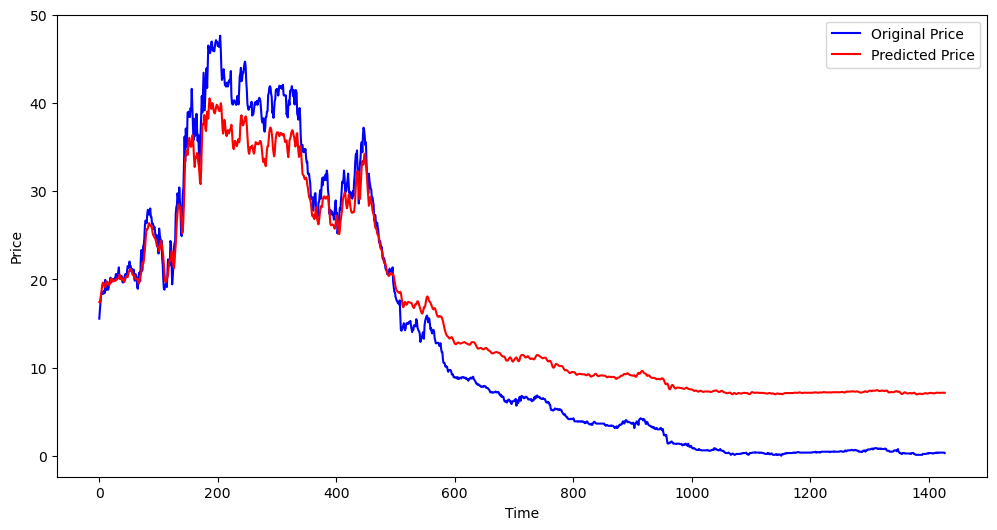

In [39]:
plt.figure(figsize=(12,6))
plt.plot(y_test , 'b' , label = 'Original Price')
plt.plot(y_predicted , 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
